# PROBLEM SET 2, EXERCISE 5
Currently we have 18 plots from the notebook in problem set 1. 


In [12]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from IPython.display import Image, display


## Reminder of the data

In [3]:
PATH = "all_data.csv"
all_df = pd.read_csv(PATH)


In [7]:
list(all_df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Family Size',
 'set',
 'Age Interval',
 'Fare Interval',
 'Sex_Pclass',
 'Family Name',
 'Title',
 'Given Name',
 'Maiden Name',
 'Family Type',
 'Titles']

In [10]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Survived       891 non-null    float64
 2   Pclass         1309 non-null   int64  
 3   Name           1309 non-null   object 
 4   Sex            1309 non-null   object 
 5   Age            1046 non-null   float64
 6   SibSp          1309 non-null   int64  
 7   Parch          1309 non-null   int64  
 8   Ticket         1309 non-null   object 
 9   Fare           1308 non-null   float64
 10  Cabin          295 non-null    object 
 11  Embarked       1307 non-null   object 
 12  Family Size    1309 non-null   int64  
 13  set            1309 non-null   object 
 14  Age Interval   1046 non-null   float64
 15  Fare Interval  1308 non-null   float64
 16  Sex_Pclass     1309 non-null   object 
 17  Family Name    1309 non-null   object 
 18  Title   

In [ ]:
#Identify null counts in each column for rows where "Survived" is not null
null_counts = all_df.loc[all_df["Survived"].notna()].isna().sum()
print(null_counts)

#Seems like we cannot use Cabin/Maide name as a feature due to high null counts

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Family Size        0
set                0
Age Interval     177
Fare Interval      0
Sex_Pclass         0
Family Name        0
Title              0
Given Name         0
Maiden Name      748
Family Type        0
Titles             0
dtype: int64


## Feature Selection from Plot
The goal is to pick plots that help in feature selection. This would require us to look at plots with hue as survived to study the preliminary relationship betwwen the variables and survived. The plots with hue as set is important to check for balance between test and training data, but not important in feature selection.

- Clearly more females survived than males (~70% vs ~20%), this is an important feature to include in the model. Theoretically, we might also guess that females are priortised when escaping, increasing the likelihood of surviving


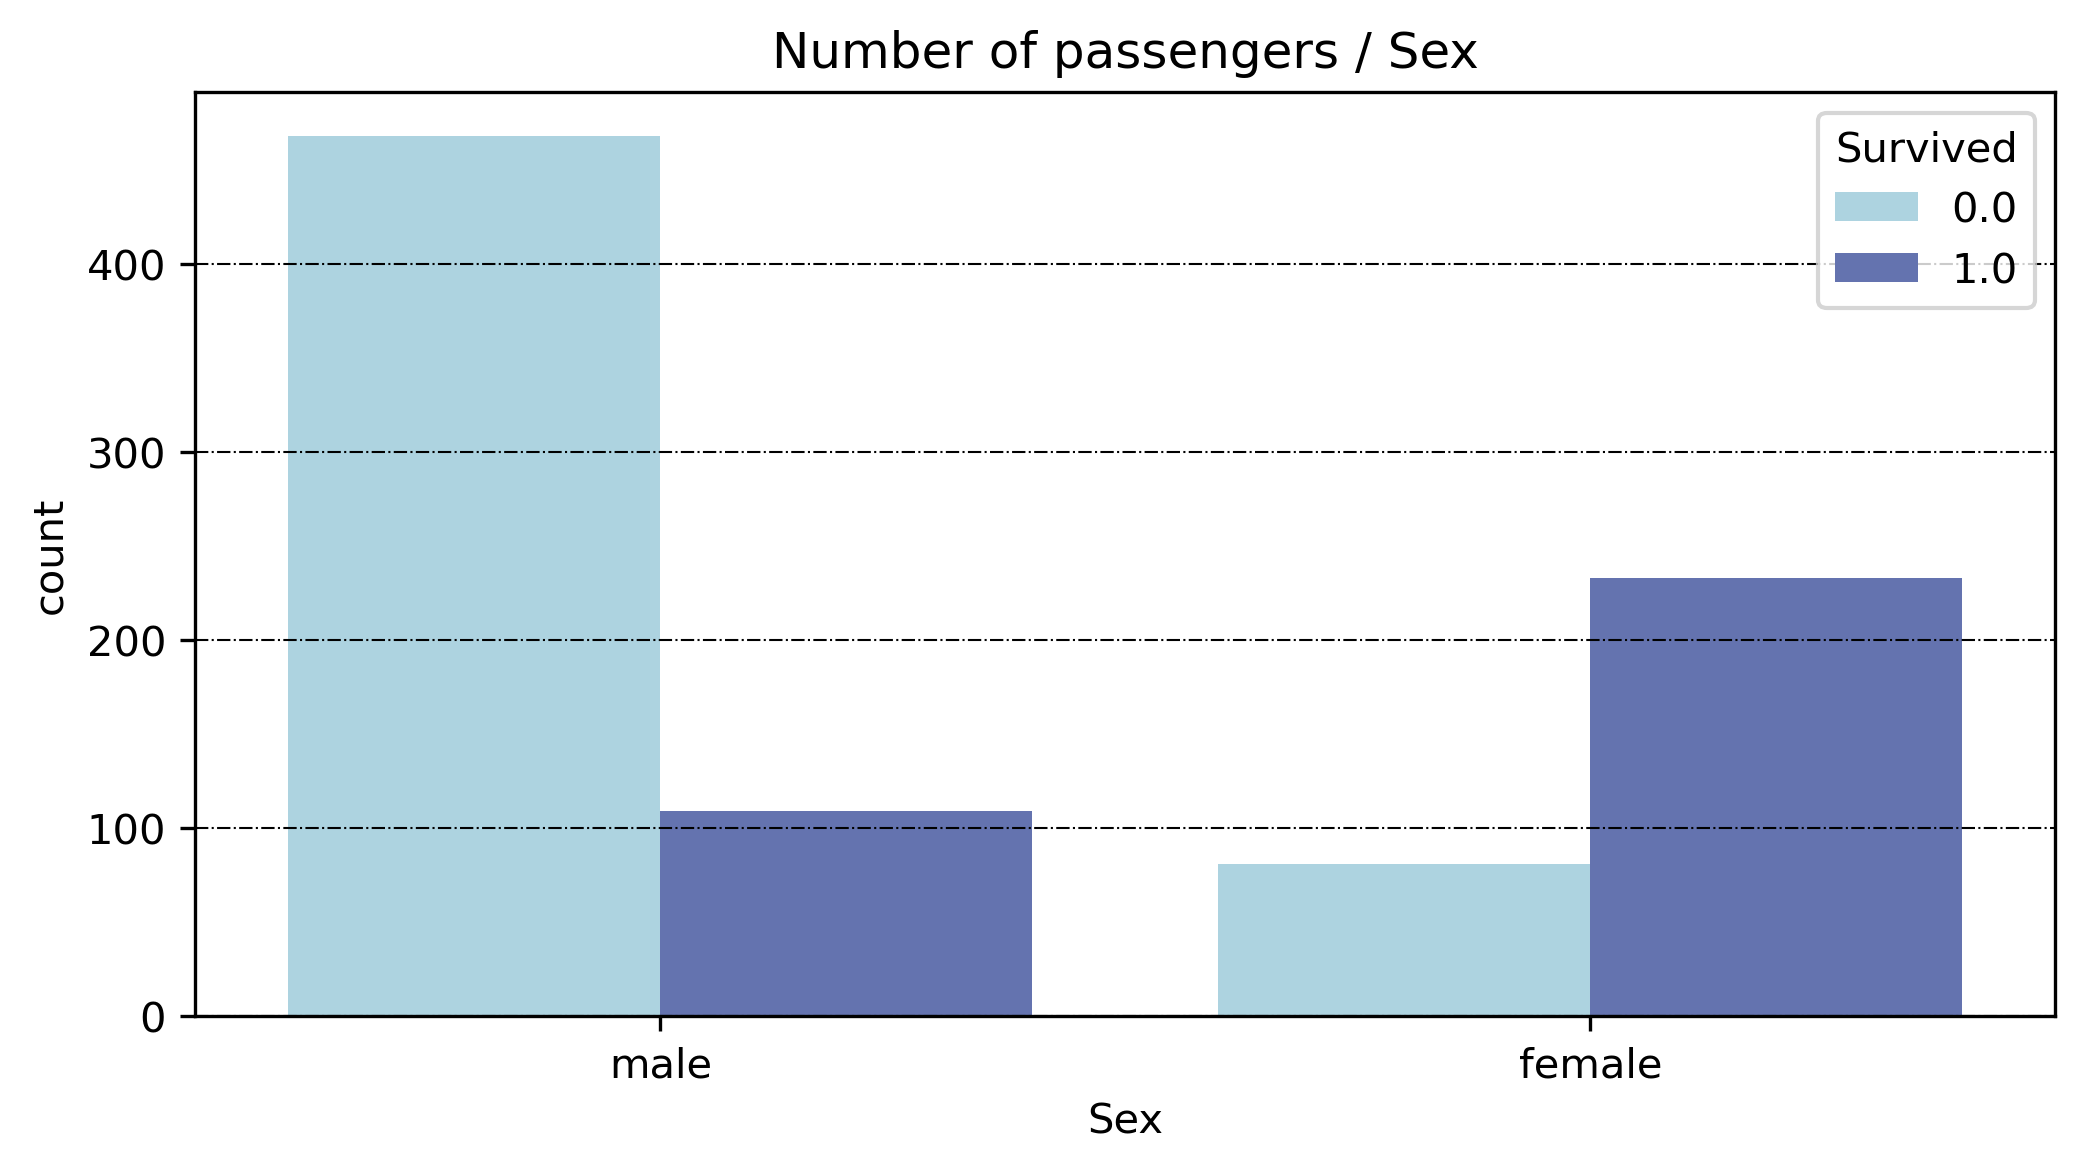

In [ ]:
display(Image("figures/Number of passengers, Sex, by Survived.png"))


- Similarly, for all count pairs by survived, all features show some sort of imbalance between categories (i.e. in a category, the percentage of people surviving are not 50-50). So, I would include them all as features, given that we have a large number of observations of n > p 
- These features are: Sex, Pclasss, SibSp, Parch, Embarked, Family Type, Titles


### Some Special Cases
1. Family Type

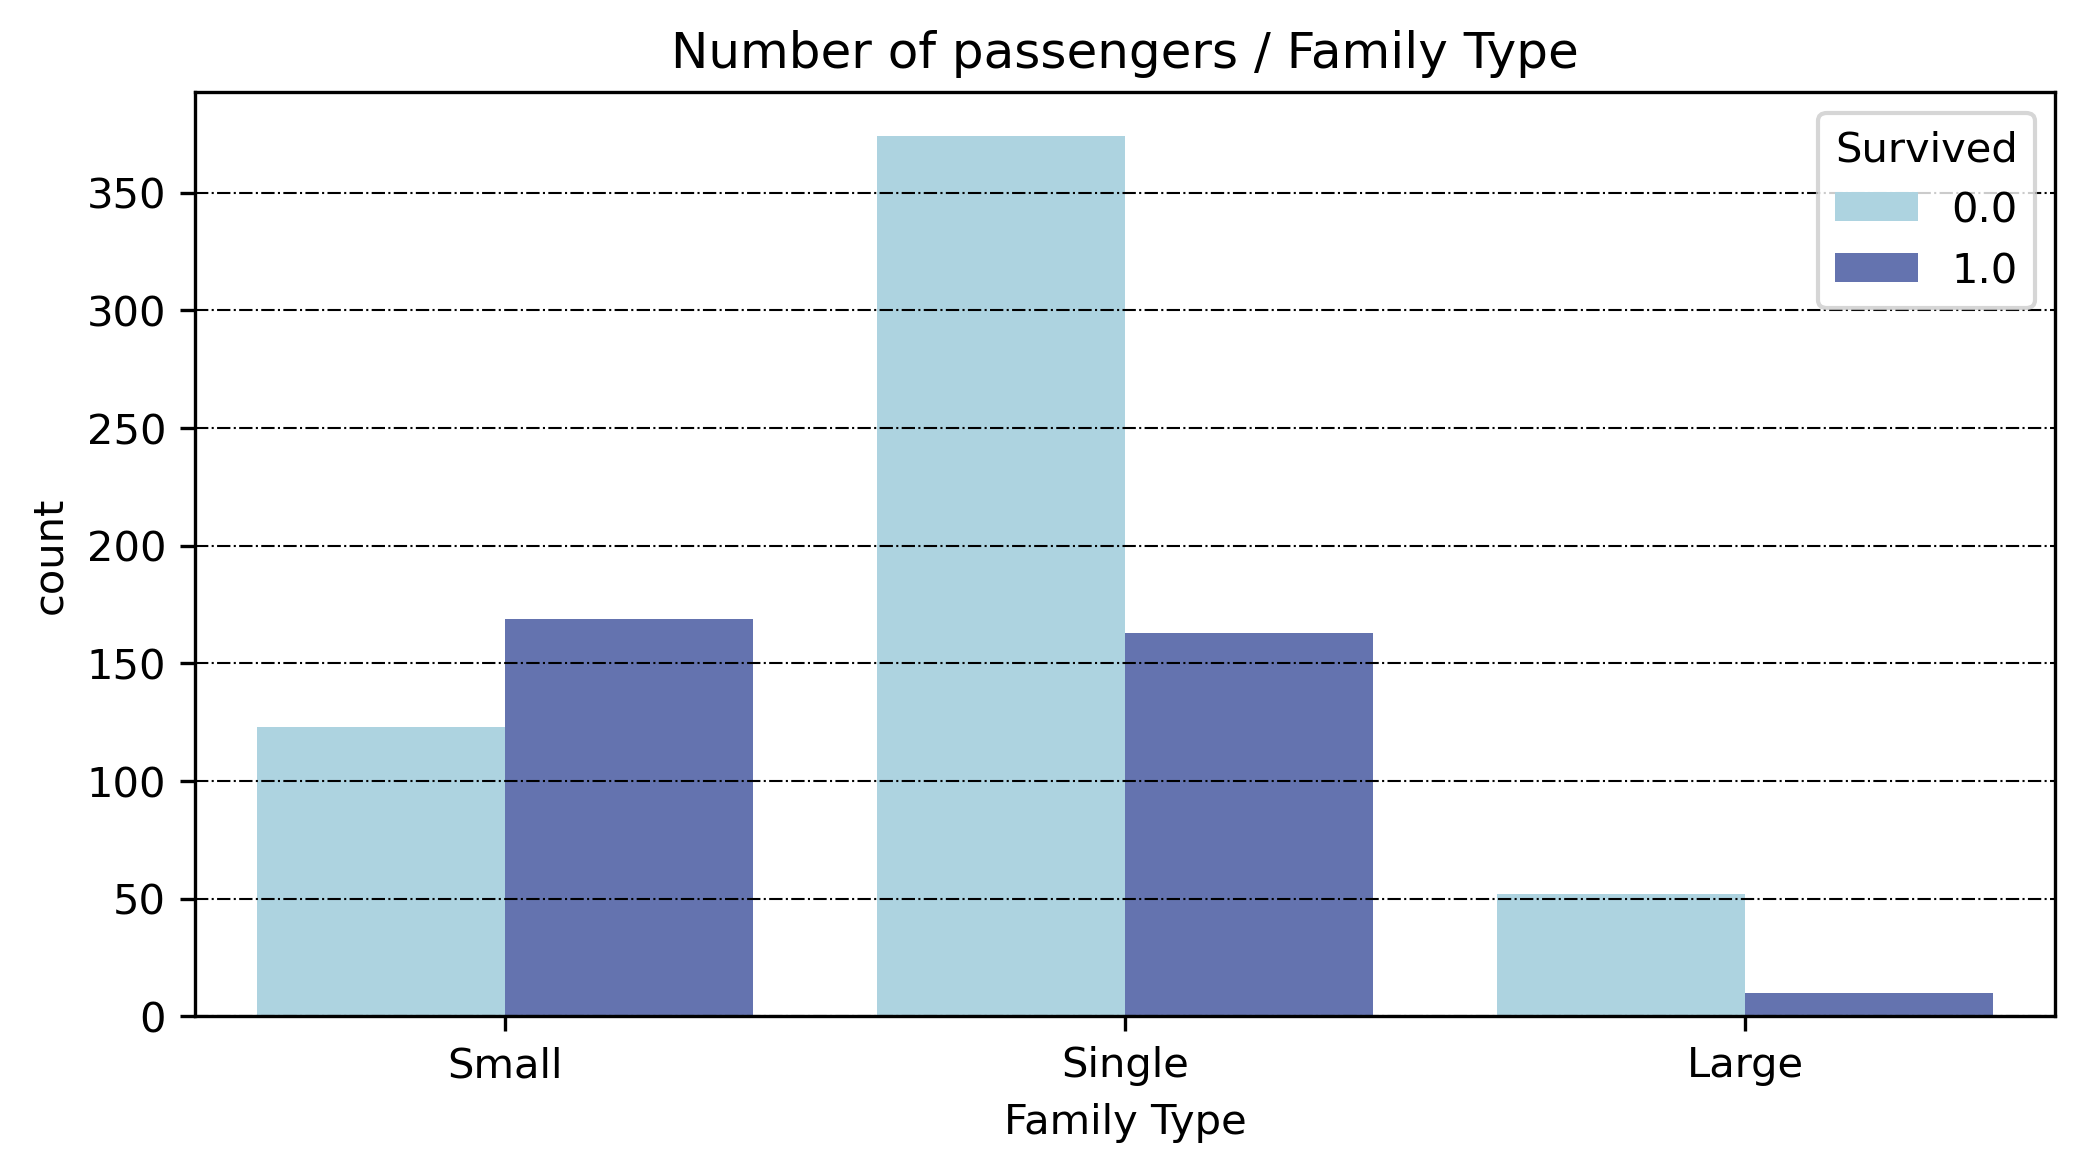

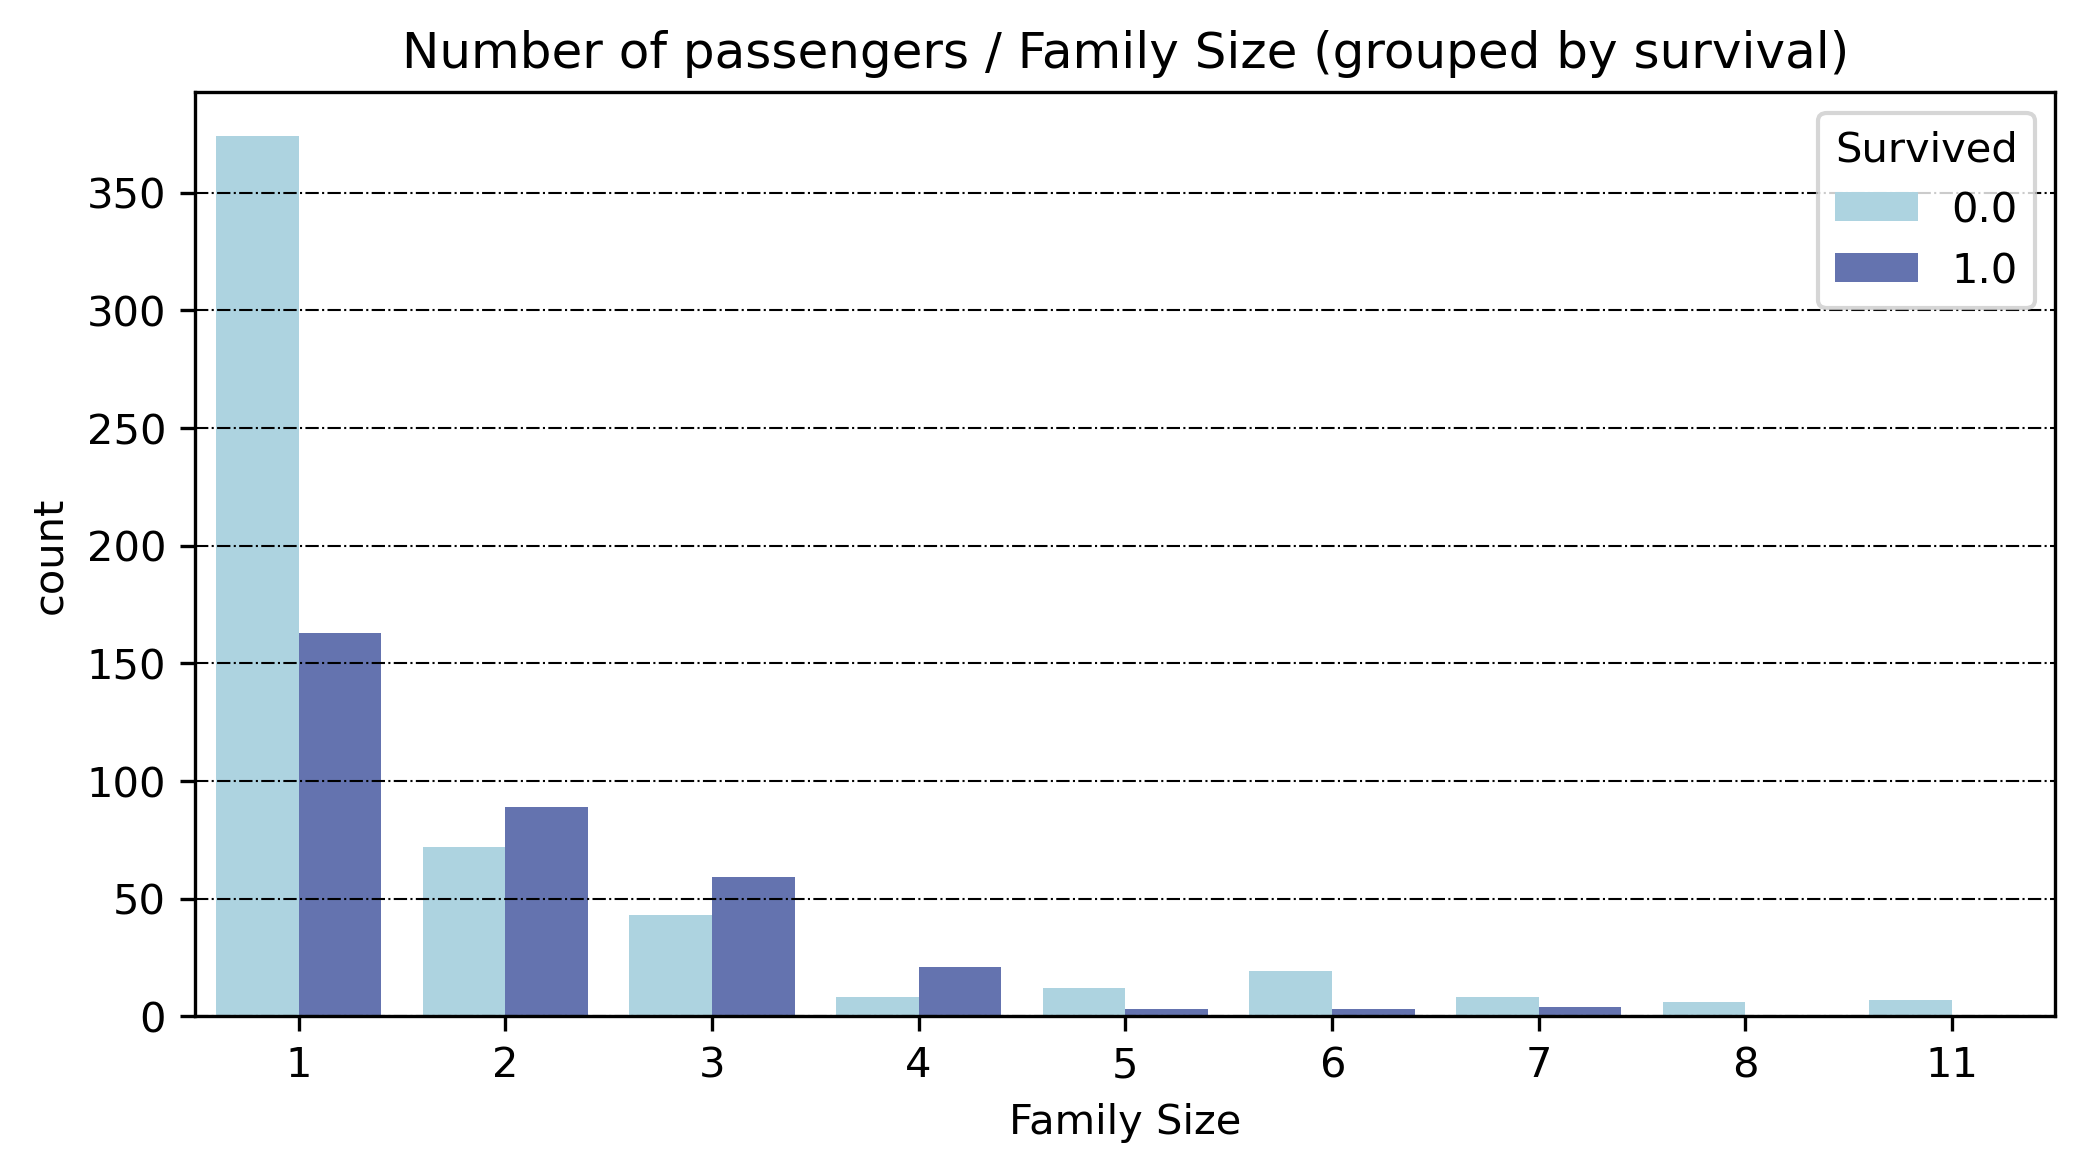

In [29]:
##New graph: Family Type by survived
display(Image("figures/Number of passengers, Family Type, by Survived.png"))

display(Image("figures/Number of passengers, Family Size (grouped by survival), by Survived.png"))


- Family Size were not selected because it might be slightly too finely categorised such that observations that has family size 11 may not have any observations be present in training/vali/test sets. This would be an issue, as it might return an NA prediction. Eg, if family sizes of 11 only appeared in the test set.
- Besides, large/small family sizes all have similar proportions of deaths, so family type retains the same amount of infomation.
- Hence, family size is picked


2. Titles

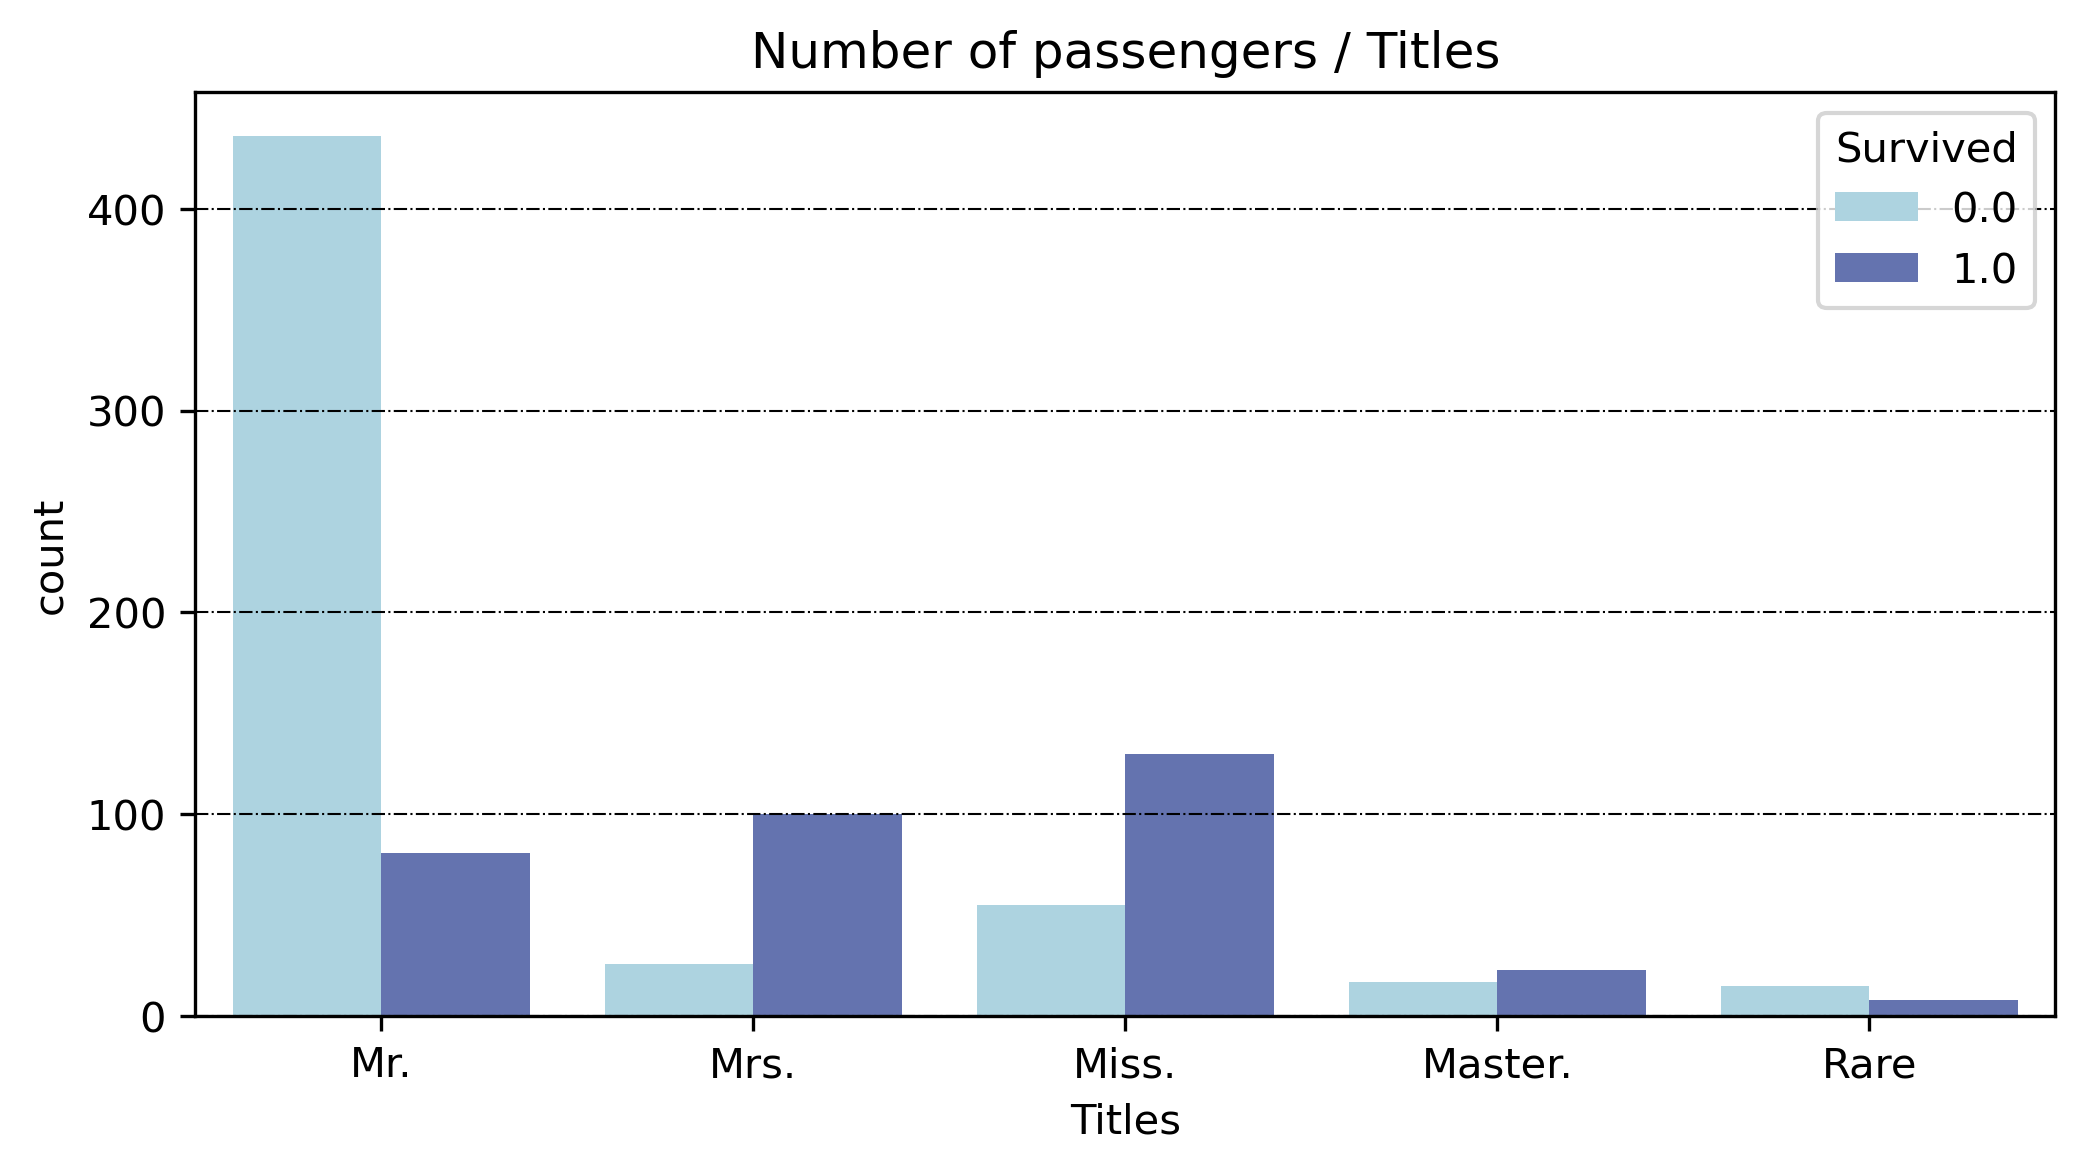

In [21]:
##New graph: Titles by survived
display(Image("figures/Number of passengers, Titles, by Survived.png"))


- Adding this can give additional information. For instance, even though men are more likely to die, that isn't the case for master. 


3. Age and Fare


- Looking at the plot below for the distribution pairs for Age and Fare, it is difficult to tell whether these factors matter as the distribution for survived and non survived is very similar:


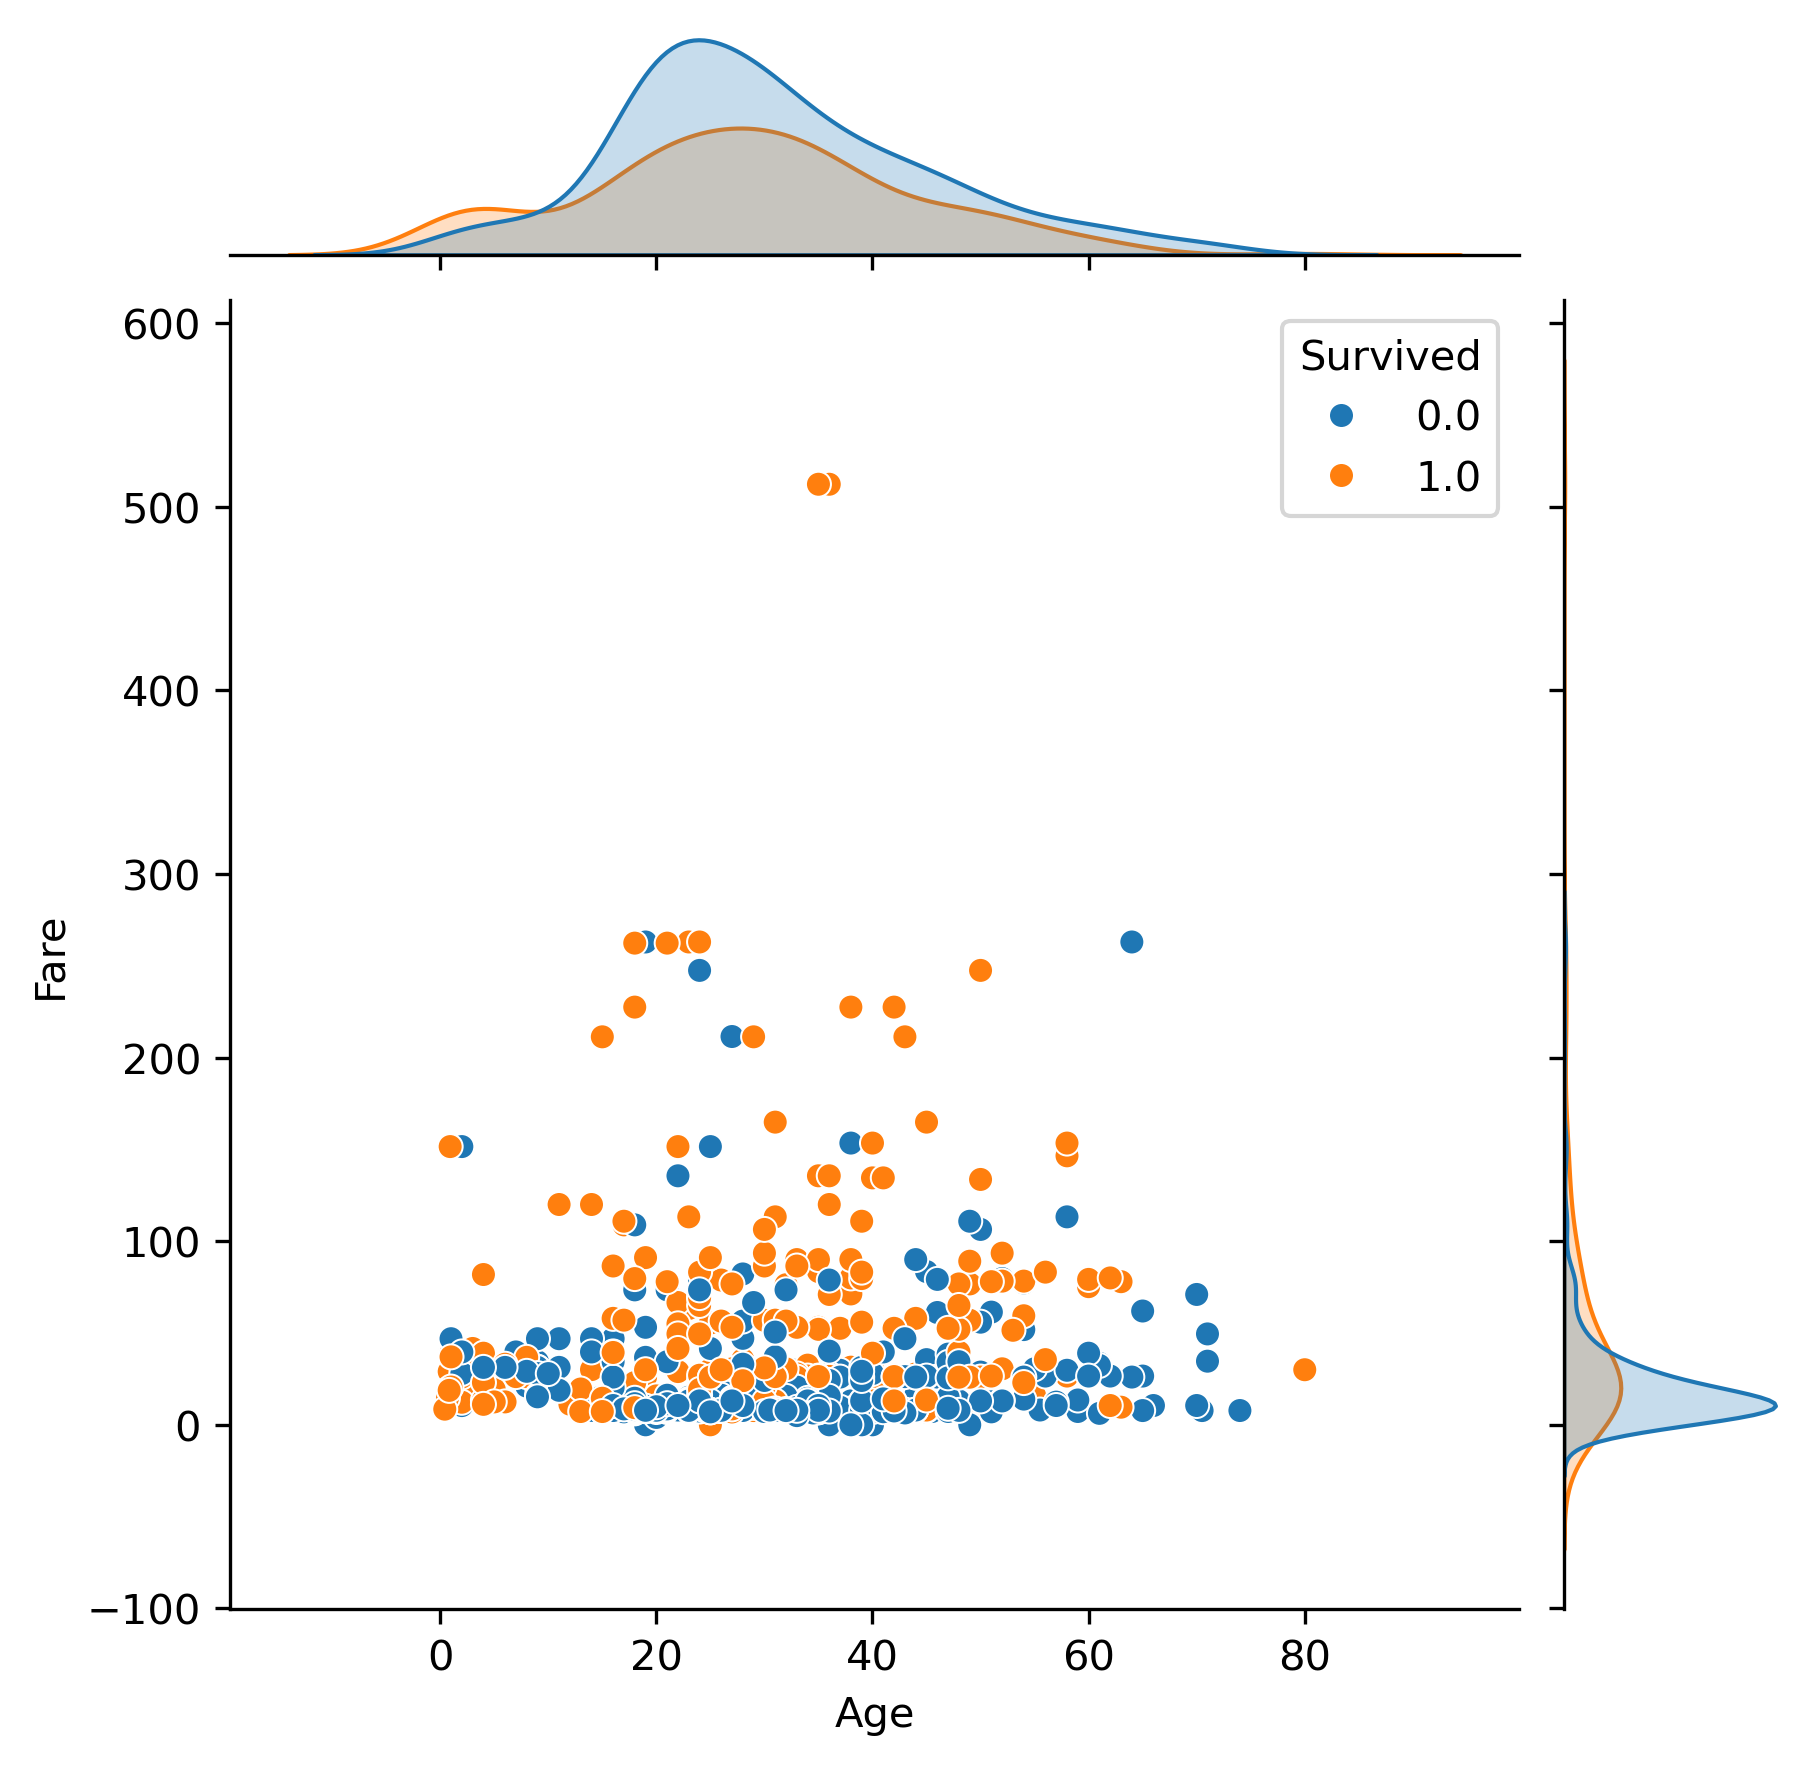

In [16]:
display(Image("figures/Plot distribution pairs for Age and Fare by Survived.png"))


- But when we look at fare intervals and age intervals, we see very clearly some ages (the younger ones) and some fares (the higher fares) are more likely to survive. So we add those into our models


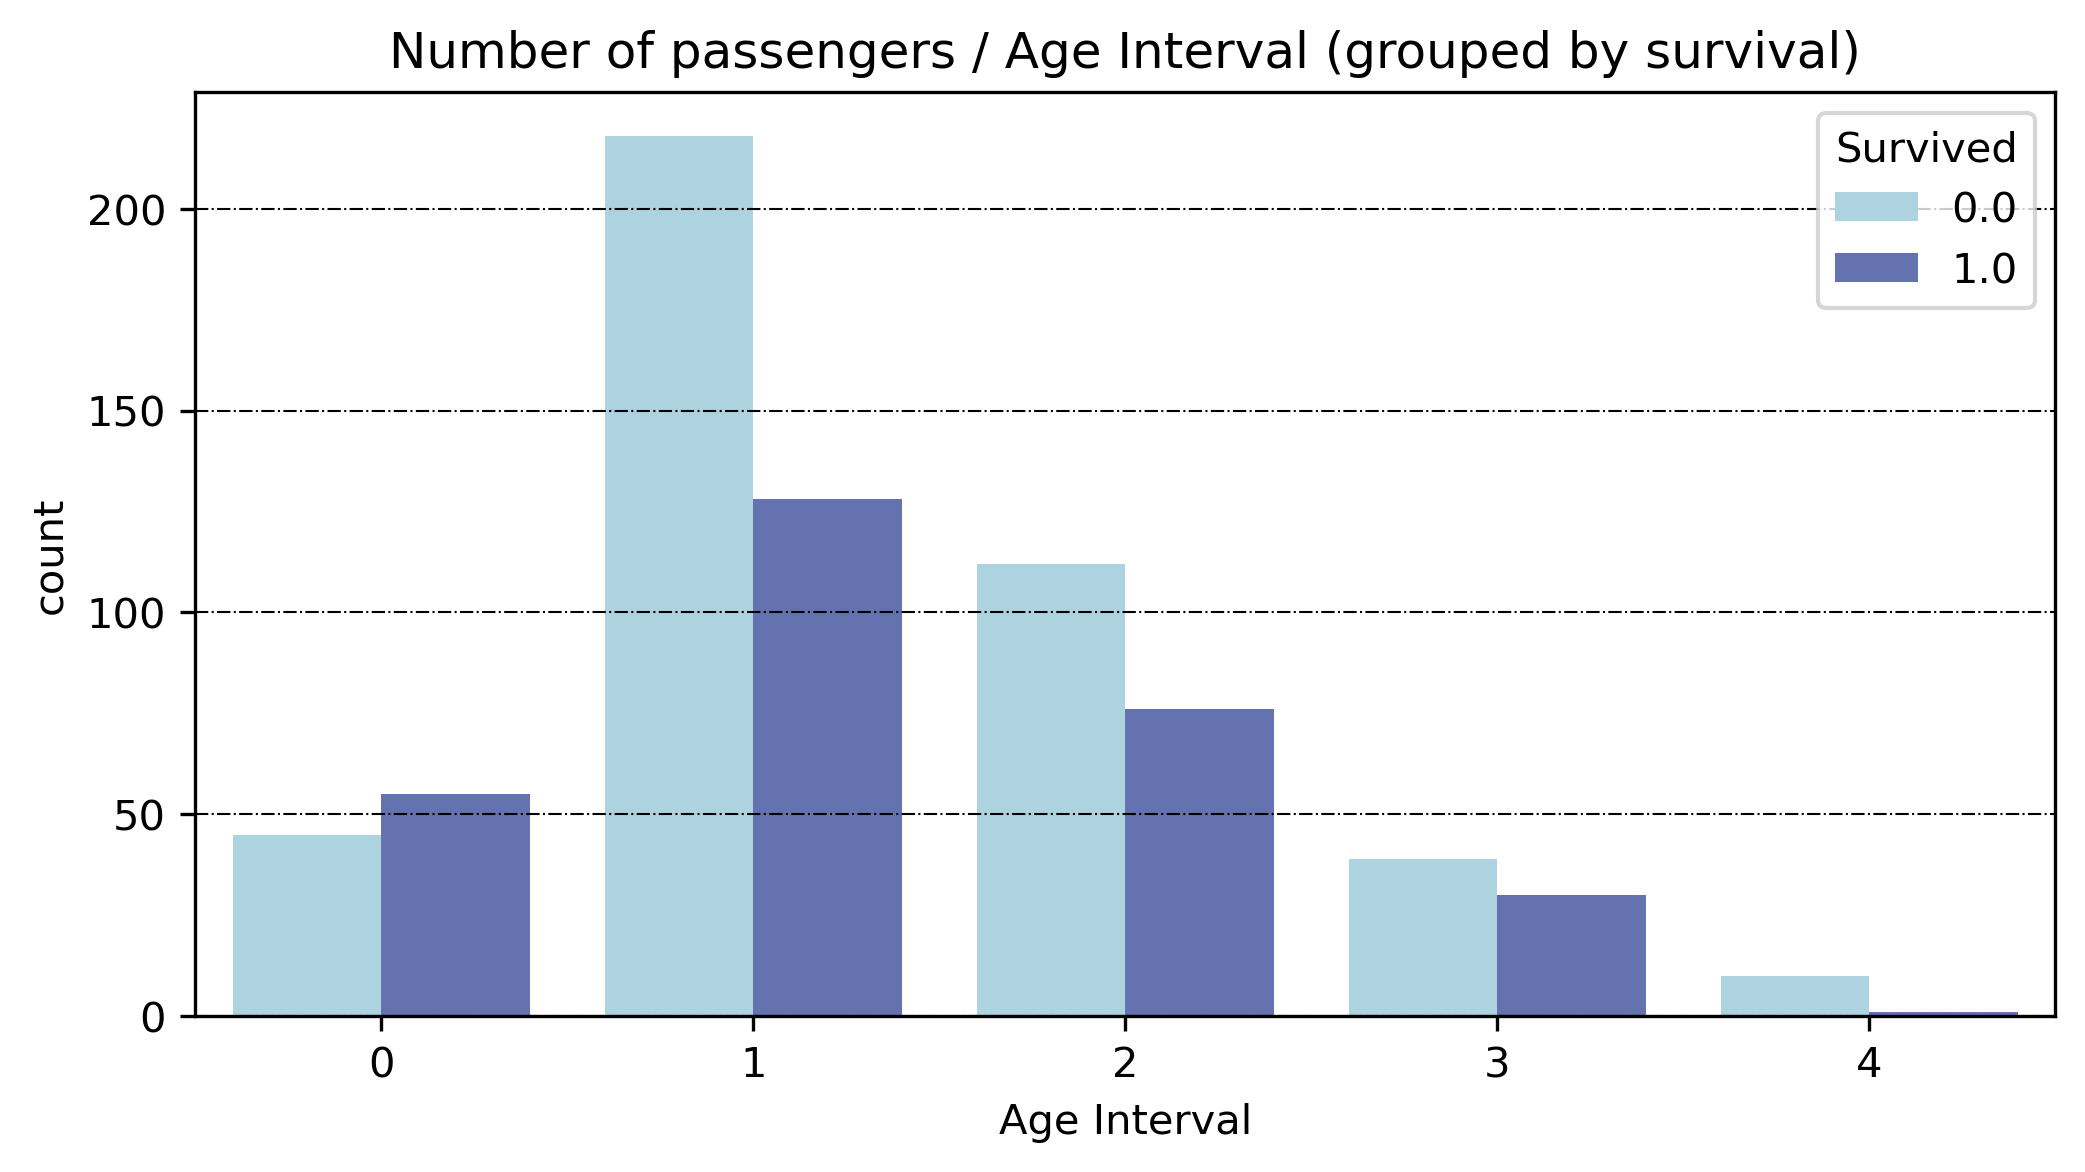

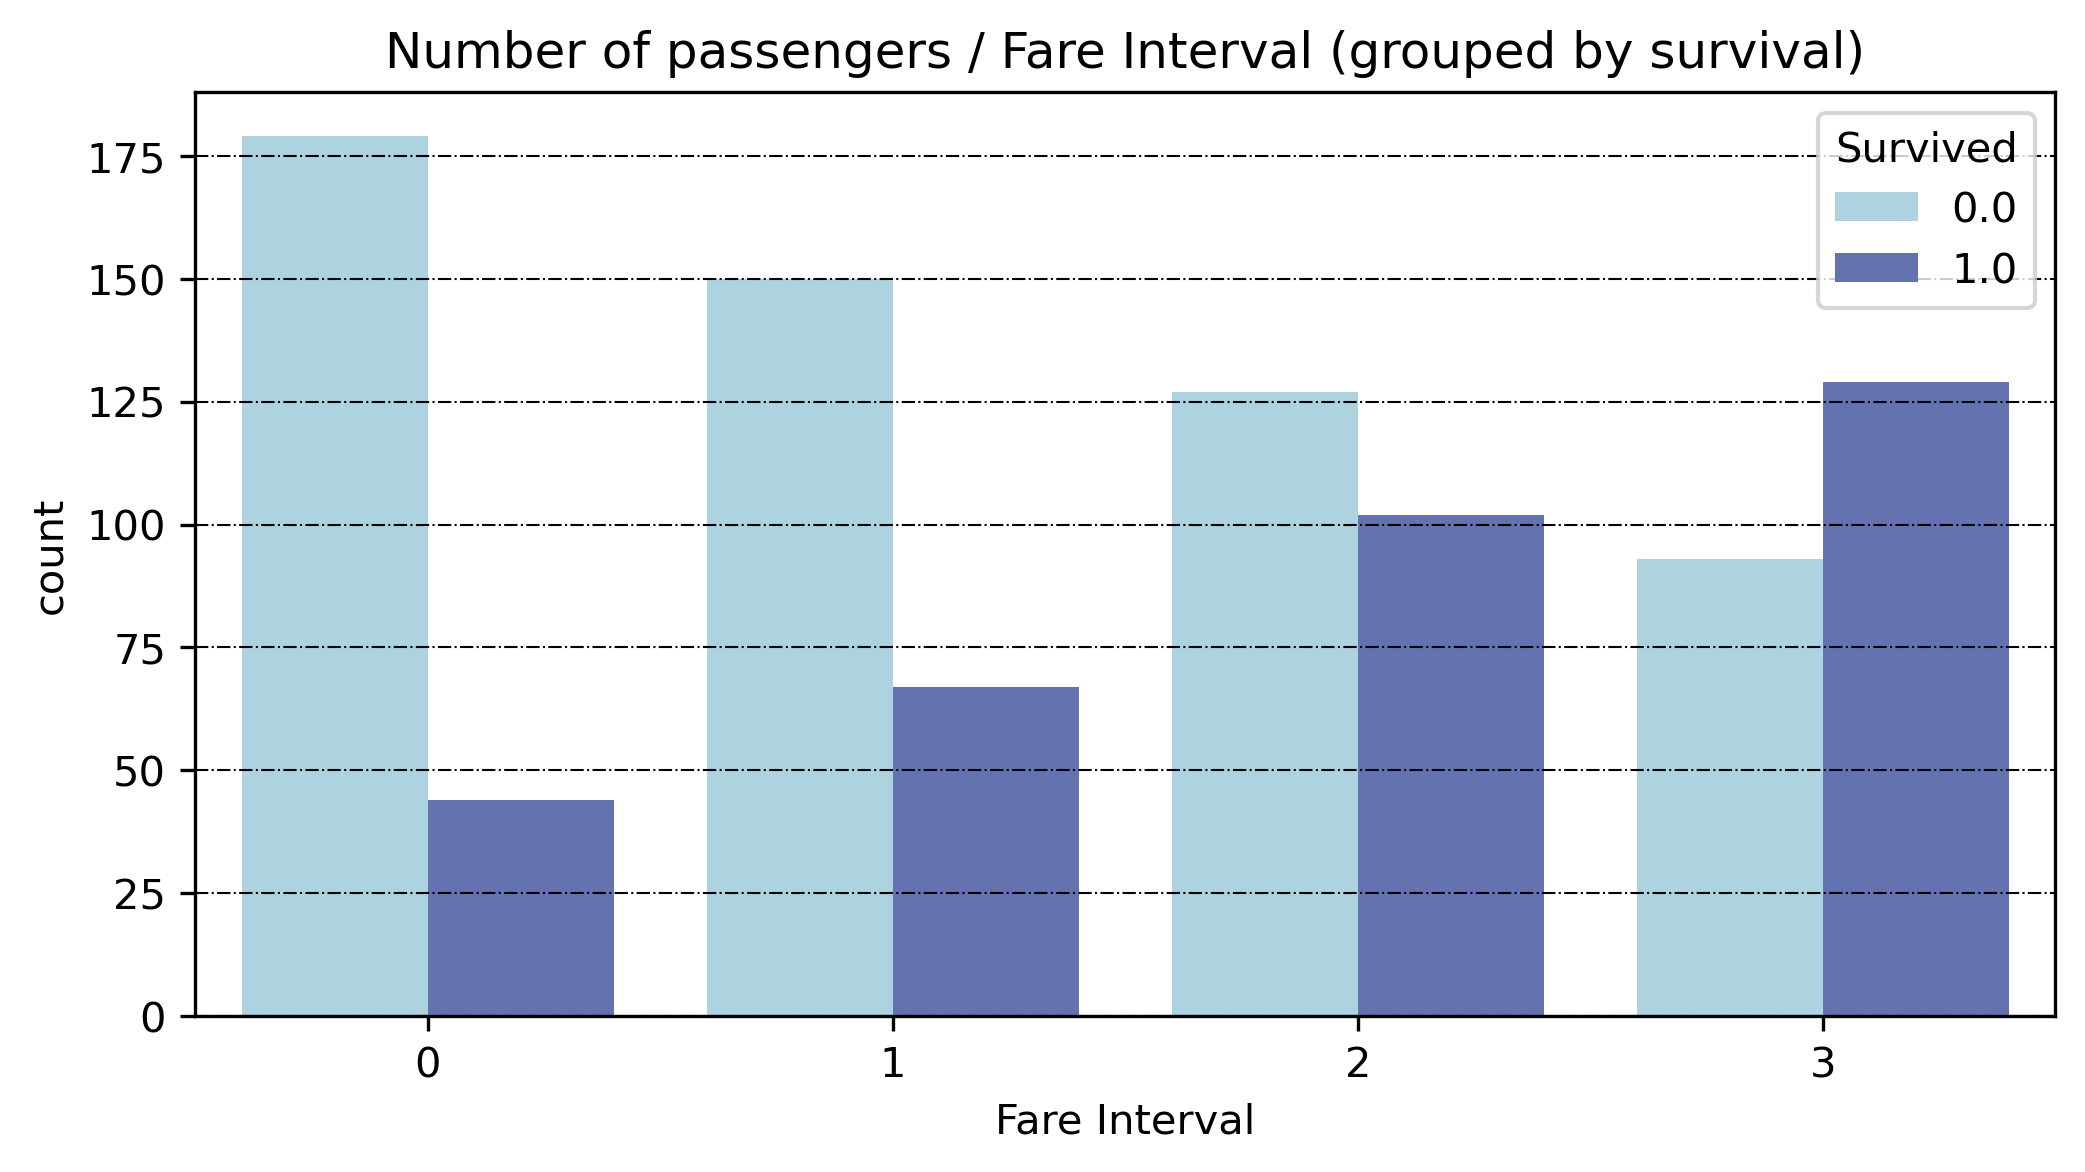

In [18]:
display(Image("figures/Number of passengers, Age Interval (grouped by survival), by Survived.png"))

display(Image("figures/Number of passengers, Fare Interval (grouped by survival), by Survived.png"))


## Interaction between features

- We should take into account interactions between features. For example, the graph belows shows the probability of survival of males differs by classes too. However, this might matter when when using linear model. A random forest classifier should be able to tease out complex interactions between features due to its non-linear nature.


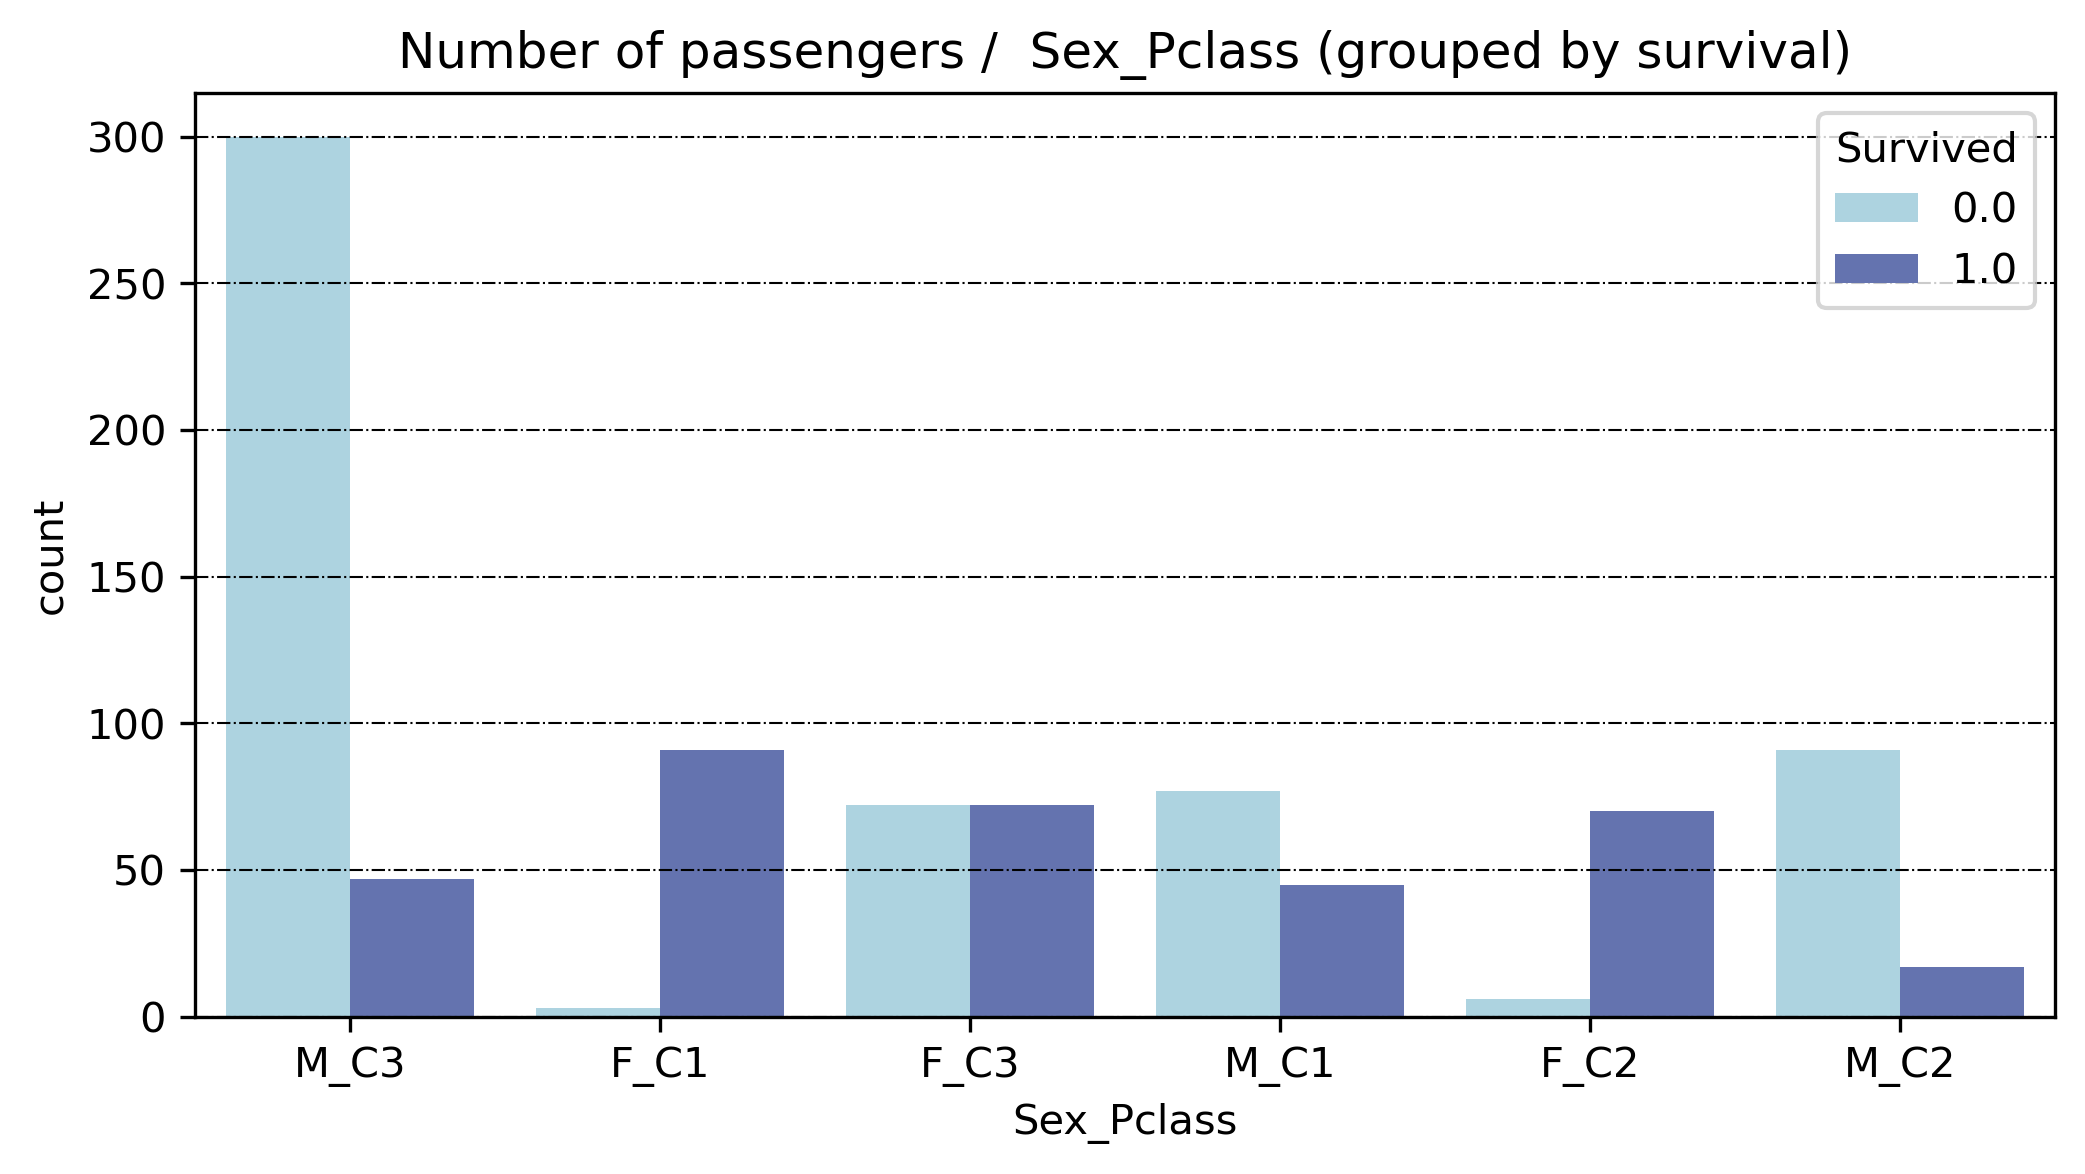

In [27]:
display(Image("figures/Number of passengers,  Sex_Pclass (grouped by survival), by Survived.png"))


- This also means that we should not discard features we might think is individually irrelevant, as there might be interactions with it that can improve prediction. 

- From all the selected features (Sex, Pclasss, SibSp, Parch, Embarked, Family Type, Titles, Fare Interval, Age Intervals), we believe we have covered all the type of information available in this data set.